# **OOP-based Python Game Development**

---

By Jean-Yves Tran | jy.tran@[datascience-jy.com](https://datascience-jy.com) | [LinkedIn](https://www.linkedin.com/in/jytran-datascience/)  
IBM Certified Data Analyst 

---

Source: 
- [Object Oriented Python](https://www.packtpub.com/product/object-oriented-python-video/9781836204473) - by ACI Learning - Packt Publishing
---

The interactive links in this notebook are not working due to GitHub limitations. View this notebook with the interactive links working [here](https://nbviewer.org/github/jendives2000/Data_ML_Practice_2025/blob/main/1-3-SQL/practice/DuckDB/notebooks/4_duckdb_handson_eda.ipynb).

---

This is a practice project where I dive into Object Oriented Programming in Python 3 and use its features to create a very simple text-based game. 

- **HOW TO READ THIS:**  
  Because this notebook cannot be the game app itself, I will describe and show the code here in it and the actual game app code, a python file, will be populated with every code given here.  
  To facilitate the reading, whenever necessary, I will add a reference to the notebook as a comment in the game app file. 


- **HOW TO USE THIS:**  
  So you know now that the code in this notebook is not building the app, and as such it's of no use to run it as is.  
  The code in the app file is the one to run. 
  So, follow along if you want to know every detail and my chain of thought.  
  I suggest you to try to build that python app file yourself, that is if you want to learn by practicing.  
  Otherwise, the app file will likely be complete and ready by the time you read this, so you will not be able to run snippets of it like I do when I make test runs and show the output. 


For this notebook, I will:
- first introduce the [dataset](#dataset-melbourne-pedestrian-count) I will work on
- [clean it up](#looking-at-the-data)
- and explore that data ([EDA](#eda))
  - including with visualizations ([Plotly & Plotly Express](#plotly))
I show: 
- some of the **intricacies** 
- and **mistakes** to avoid while working with DuckDB
- and **how to plot** line graphs, box plots and histograms


<u>**OUTLINE:**</u>  
This notebook is made of 


<u>**The main 2 takeaways:**</u>:
- to experience first-hand:
  - the **workflow implied by using DuckDB** 
  - and some of its **intricacies and specificities**: 
    - offloading a dataset, prepping it up, and saving it locally.
- to quickly **experience and understand** how **DuckDB is leveraged**
  - in a light EDA project, mixing 
    - the use of SQL via DuckDB and its modules, 
    - Pandas and an interactive visualization tool, Plotly, 
    - directly in Python.

---


## **Game Design Decisions**:

- **Game Type & Structure:**
  The game is a text-based hack-and-slash where players engage in **turn-based** combat. The engine is intentionally minimal to start—essentially a **basic framework built with object-oriented principles**.

- **Iterative Design Process:**
  I plan to develop the game in **iterations**, starting with a very simple version (think “Version 0.001”) that will later evolve by **adding complexity**. This approach ensures that even if the full project seems overwhelming, it begins with a manageable, incremental process.

- **Core Game Elements:**
    - **Player**: The player character will have **key attributes** such as a name and a level. The level will directly **influence** their attack power, reinforcing the connection between progression and combat effectiveness.
    - **Enemy**: The adversary is a generic monster, designed to be a **simple yet flexible opponent** that can be **expanded** upon in future iterations.
  
- **Game Flow & Options:**
  At the **start**, players experience an introductory text (a nod to classic “Ready Player One” scenarios). When an enemy appears, players are given a set of options:
  - **Attack**: Engage directly with the enemy.
  - **Run**: Exit the encounter, which includes a brief delay to emphasize the action.
  - **Pass**: Skip the turn, a choice that might still leave the player vulnerable to enemy attacks or even lead to facing a different foe.

- **Inspiration & Vision:**
  The design decisions draw heavily from classic video game experiences, ensuring that even this simplified game **reflects thoughtful gameplay mechanics and a clear, iterative developmental path**.

---


## **Defining the Player Class**:

I will call them `actors`.
Each actor has to have: 
- a level
- a name

So, my class here is the `Player` class, which I will use to create each new Actor.
I am defining that class now: 

In [ ]:
# find this in the game app file with this comment: # I
class Player: 
    def __init__(self, name, level) -> None:
        self.name = name
        self.level = level

    # adding a print-out function 
    def __repr__(self) -> str:
        return ('<Player: {} at Level {}>'
                .format(self.name,
                        self.level))

The `__repr__` function will print out the name and level of any called upon Player.  
This is convenient to have that, confirming each new instantiation. 

### **Adding the Attack**: 

For the attack I do **not want a generic attack** that deals a definite amount of damage, I want something **less predictable**.  

For that I use the module `random` and the function `randint` (imported at the top of the app file) to make that damage completely random, within a range that I specify. 

In [ ]:
# I-1
def get_attack_power(self):
        return randint(1, 100) * self.level

The little math there is as simple as it looks.  
The random number is from 1 to 100 and it is multiplied by the level of the Player.  
This is a nice way to add that **progress aspect** in the attack attribute.  

## **Defining the Enemy Class**: 

Enemies are slightly different from Players, I want them:
- to be have a **kind** (Ooze, Ogre, Dragon, Elf, Human, etc)
- and also have a **level**

In [ ]:
# II
class Enemy: 
    def __init__(self, kind, level) -> None:
        self.kind = kind
        self.level = level
        
    def __repr__(self) -> str:
        return ('<Enemy: {} at lvl {}>'.format(self.kind,
                                    self.level))

## **Creating New Player & Enemy**: 

My 2 classes are defined and ready to go:

In [ ]:
# A1
player_1 = Player(name='Chandra', level=1)
ogre_1 = Enemy(kind='Ogre', level=1)
player_1, ogre_1

(<Player: Chandra at Level 1>, <Enemy: Ogre at lvl 1>)

### `if __name__ == "__main__":`

Before I run the previous code snippet, I added this line: 
`if __name__ == "__main__":`

This ensures that **only the code in that same python file** is executed. It prevents it from being executed if the file is moved to another app.  It's a good practice to add it if you want to test run code. 

Ok, the app file is ready for a small run test, let's add 2 prints to check if everything was well executed: 

In [ ]:
if __name__ == "__main__":
    # A1
    player_1 = Player(name="Chandra", level=1)
    ogre_1 = Enemy(kind="Ogre", level=1)
    print(player_1, ogre_1)
    print(player_1.get_attack_power())

### **First test run**:

Just below is what it outputs.

The new player and enemy were created according to my classes. I see the values that I assigned to each.

The number "**91**" is the attack damage.  Because I used `randint` that 92 has to change every time I run the code.  Which was the case.  
Let's not forget that that **damage is multiplied by the level** number of that player too. Here it was just level 1. 

So all is fine so far.

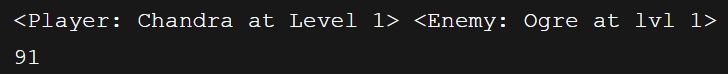

## Adding Attack to the Enemy Class: 

What's the point of an encounter if the enemy can't even attack, right? 
Let's add that same attack attribute that I added to the Player class:

In [ ]:
# II
class Enemy: 
    def __init__(self, kind, level) -> None:
        self.kind = kind
        self.level = level
        
    def __repr__(self) -> str:
        return ('<Enemy: {} at lvl {}>'.format(self.kind,
                                    self.level))

    # II-1
    def get_attack_power(self):
            return randint(1, 100) * self.level

And print it out:

In [ ]:
if __name__ == "__main__":
    # A1
    player_1 = Player(name="Chandra", level=1)
    ogre_1 = Enemy(kind="Ogre", level=1)
    print(player_1, ogre_1)
    print(player_1.get_attack_power())
    # A1b
    print(ogre_1.get_attack_power())

Of course I got the same output for my player and enemy but now I see the ogre damage too: "**5**". 

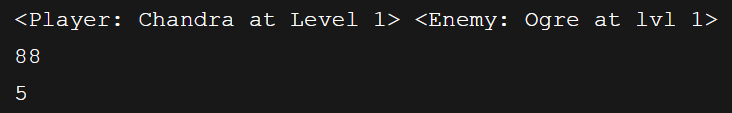